#### Topics:


Why WordCloud

Text Pre processing

Why t-sne


In [1]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import nltk
import gensim
from sklearn.manifold import TSNE

unable to import 'smart_open.gcs', disabling that module


In [2]:
df = pd.read_csv(r"Youtube02-KatyPerry.csv", encoding = 'latin-1')

In [3]:
comment_words = ' '
stopwords = set(STOPWORDS)

In [4]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,1
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
COMMENT_ID    350 non-null object
AUTHOR        350 non-null object
DATE          350 non-null object
CONTENT       350 non-null object
CLASS         350 non-null int64
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


We will only need the CONTENT column for our analysis purpose

In [6]:
for doc in df.CONTENT:
    tokens = doc.split()  #Each document is split in the form ['word1', 'word2',...'wordn']
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    for word in tokens: 
        comment_words = comment_words + word + ' '
        
#type(comment_words)

Wordcloud represents the importance of words in the corpus (The whole text we assume). The most important words are highlighted much 

In [7]:
#We filter out the stopwords like and, or etc
wordcloud = WordCloud(width = 800, height = 800, stopwords = stopwords).generate(comment_words)

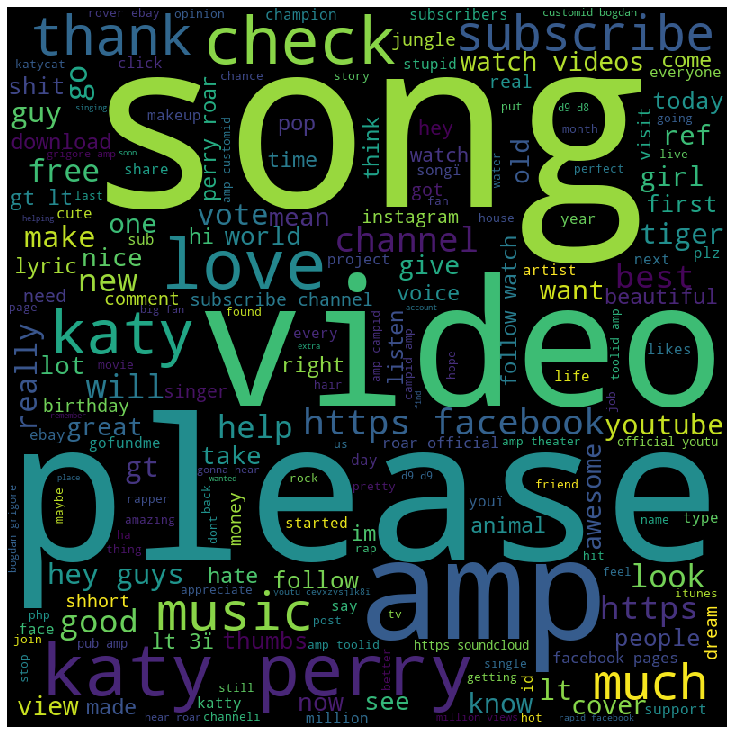

In [8]:
plt.figure (figsize = (10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)

plt.show()

We still try something fancy. In the data folder we have two images apple and katy1. We can apply those images as the mask.

In [9]:

import numpy as np
from PIL import Image
katy_mask = np.array(Image.open('katy1.jpg'))
katy_mask  ##This image would be displayed as matrix of pixels [R,G,B]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [10]:
# Save the image in the folder:
wordcloud.to_file("katy.png")

In [11]:
#Height and width parameters wont make sense here
wordcloud = WordCloud(background_color='white', mask = katy_mask, contour_width=3, contour_color='violet', stopwords = stopwords).generate(comment_words)

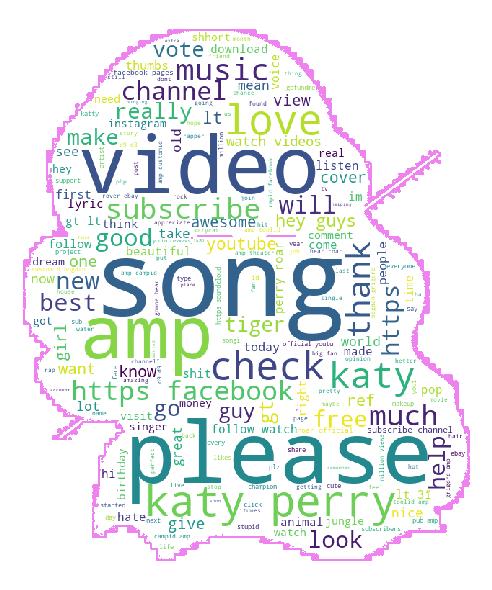

In [12]:
plt.figure (figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)

plt.show()

In [13]:
##Lets do some more things. Use regex, and show t-sne plot

This could be very advanced topic for high school level. I will think if I can simplify it further. If I am not able to do so, I might skip this topic

#### Processing text 

In [14]:
#Import regular expression, import stopwords from nltk library
import re   #For the text preprocessing
STOP_WORDS = nltk.corpus.stopwords.words()  #For stop words, this time from nltk

In [15]:

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    ##Should you remove sentences starting with https also ? Just to remove all the websites ? Try how you can do
    ##apply some regex here
    #regex = re.compile(r'http\S+')
    #What about the & signs ? we can think about that also
    sentence = regex.sub('', val).lower()           #Remove the non letters from the corpus
    sentence = sentence.split()
    
    for word in list(sentence):                     #We are making list of lists here. Each document in one list.
        if word in STOP_WORDS:                      #We filter out the stop words again
            sentence.remove(word)  
            
    sentence = " ".join(sentence)                   #Join the sentences before returning
    return sentence

def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to CONTENT"
    data = data.dropna(how="any")
    
    for col in ['CONTENT']:
        data[col] = data[col].apply(clean_sentence)
    
    return data

data = clean_dataframe(df)
data.head(5)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,love much generate free leads auto pilot amp h...,1
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,httpwwwbillboardcomarticlescolumnspopshop61741...,1
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,hey guys please join fight help abusedmistreat...,1
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,httppsnbosscomref2tggp3pv6l songï,1
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,hey everyone watch trailer httpbelievemefilmco...,1


Try cleaning it more? Lets remove The websites. Then lets remove anything undesired

In [16]:
#type(data[['CONTENT']].iteritems())
# d=data[['CONTENT']].iteritems()   ##This is a generator
# for _ in d:
#     print(type(_))



Building corpus that will fit into the word2vec model

In [17]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['CONTENT']:   #This is a dataframe with CONTENT column only
        for sentence in data[col].iteritems():     #This is now a generator of tuples. The second parameter has sentences
            word_list = sentence[1].split()        #Split the sentences in a comma separated words within a list
            corpus.append(word_list)               #Now we make a full corpus combining all the wordlists or the documents
            
    return corpus

corpus = build_corpus(data)        
corpus[0:5]

[['love',
  'much',
  'generate',
  'free',
  'leads',
  'auto',
  'pilot',
  'amp',
  'httpwwwmyleadergatecommoretrafficï'],
 ['httpwwwbillboardcomarticlescolumnspopshop6174122fanarmyfaceoffround3',
  'vote',
  'sones',
  'pleasewere',
  'vipsplease',
  'help',
  'us',
  'gtltï'],
 ['hey',
  'guys',
  'please',
  'join',
  'fight',
  'help',
  'abusedmistreated',
  'animals',
  'fund',
  'go',
  'helping',
  'pay',
  'vet',
  'billsand',
  'helping',
  'find',
  'homes',
  'place',
  'extra',
  'emphasis',
  'helping',
  'disabled',
  'animals',
  'ones',
  'otherwise',
  'would',
  'put',
  'sleep',
  'animal',
  'organizations',
  'donate',
  'please',
  'httpwwwgofundmecomangelsnwingzï'],
 ['httppsnbosscomref2tggp3pv6l', 'songï'],
 ['hey', 'everyone', 'watch', 'trailer', 'httpbelievemefilmcomhlrh2hqbuvbï']]

We have some websites also in our list. We can remove them also using regex

#### Word Embeddings and T-sne visualization

Word2vec is a group of related models that are used to produce word embeddings. Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located close to one another in the space.

In [18]:
from gensim.models import word2vec
model = word2vec.Word2Vec(corpus, size=32, window=20, min_count=5, workers=4)
model.wv['katy']  #Lets see the word vector katy trained in our model.wv

array([-0.00546209,  0.00727027, -0.01162844, -0.00389908, -0.00914453,
        0.00947546,  0.00496018, -0.00204629,  0.00691935,  0.01132951,
       -0.00335445,  0.01340791,  0.00897441, -0.00042127, -0.01365311,
        0.01125503, -0.00835885,  0.01510749,  0.00764615,  0.00611841,
       -0.00126408, -0.01421139,  0.00998454, -0.0057327 , -0.00308217,
       -0.00567427, -0.00593876,  0.01121864,  0.01034656, -0.01640102,
        0.00582436, -0.01185419], dtype=float32)

In [19]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\tranq\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


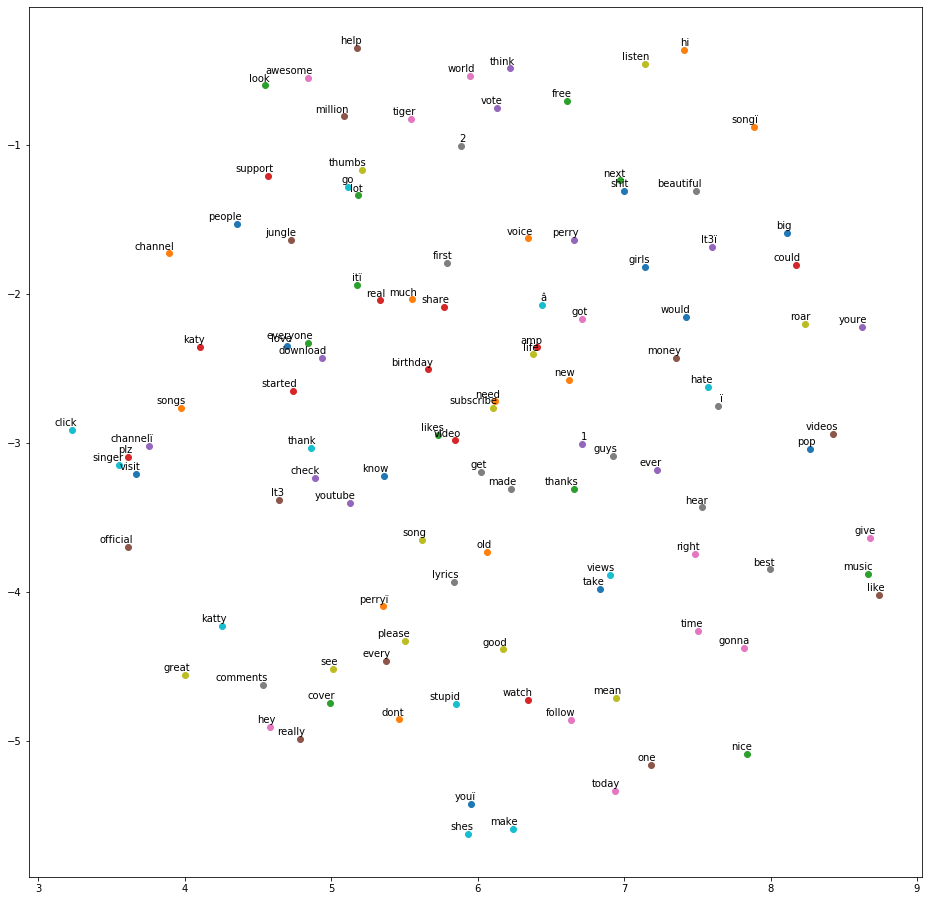

In [20]:
tsne_plot(model)

Word relationships can be seen from the above graph. Similar words are nearby each other

In [21]:
#Get out the similar words. It will be displayed in 'word':score format. The first entry would be similarity with the word itself. 
#If the word is not in our vocabulary, there would be a KeyError.
model.most_similar('listen')


C:\Users\tranq\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('good', 0.4791819453239441),
 ('amp', 0.4510090947151184),
 ('guys', 0.4092550277709961),
 ('life', 0.40047454833984375),
 ('new', 0.3946682810783386),
 ('hi', 0.3907000720500946),
 ('made', 0.38672447204589844),
 ('next', 0.3845342993736267),
 ('started', 0.3740895390510559),
 ('think', 0.37154871225357056)]

With a collection of only 300 documents, we cant still see better results. Next time we can try something with a larger corpus.

We can see not every data makes sense. In the assignments proper data would be selected

Project work could include finding restaurants which are children friendly 

#### References:

https://www.datacamp.com/community/tutorials/wordcloud-python    

https://github.com/rouseguy/DeepLearning-NLP 

Wikipedia